<div style="text-align:center; font-size:36px; font-weight:bold; color:#2874A6; text-shadow: 1px 1px 2px #000;">
    Car Price Prediction Project
</div>

## **PHASE 5 PROJECT: GROUP 5**

### **Team Members:**
- **Kelvin Mwaura**  
- **Marion Achieng**  
- **Gerald Mwangi**  
- **Jackson Munene**
- **Benedict Kuloba**

### **Introduction**

The used car market in Kenya is a vibrant and evolving landscape, where a wide range of vehicles are bought and sold regularly. Navigating this market can be challenging, as both buyers and sellers often face the difficulty of determining fair prices due to various influencing factors such as age, mileage, and condition of the vehicles. Accurate price estimation is crucial for making informed decisions in this dynamic market.

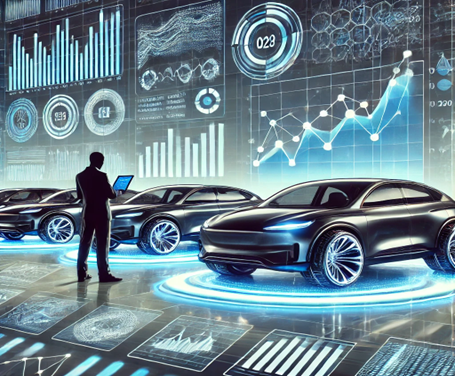

*Figure 1: A visual depiction of predictive analytics integrated with modern automotive sales.*

---

### **Overview**  
In today's era of data-driven decision-making, **machine learning** has emerged as a powerful tool for predicting used car prices with remarkable accuracy. By leveraging **historical data**, machine learning models can uncover key factors influencing car prices, thus aiding both **buyers** and **sellers** in making informed decisions.  
This project focuses on creating a machine learning model tailored specifically to the **Kenyan market**, aiming to predict the value of used cars based on various features.

---

### **Objective**  
The primary objective of this project is to develop a **reliable machine learning model** that predicts the prices of used cars in **Kenya**. The model will consider different factors, such as the car’s **age**, **mileage**, and **condition**, to estimate its market value. The ultimate goal is to empower users with a tool that provides **informed decisions** in the Kenyan used car market.

---

### **Business Understanding**

#### **Problem Statement**  
Determining a fair and accurate price for a used vehicle in **Kenya** can be a challenging task due to the wide range of factors that influence car value. **Both buyers and sellers** require a robust system capable of providing reliable price estimates to enable smoother and more transparent transactions.

#### **Objectives**  
1. **Develop a predictive model** capable of accurately estimating the prices of used cars in Kenya.  
2. **Identify key factors** influencing car prices, such as age, mileage, and condition.  
3. **Create a user-friendly application** that allows users to input car details and receive accurate price estimates, aiding them in decision-making.

---

### **Data Understanding**  
The data for this project was sourced from various **Kenyan online marketplaces** and **classified listings**. This dataset contains car listings from **2021**, capturing key information such as the car’s **make**, **model**, **year of manufacture**, **mileage**, **fuel type**, **transmission**, and the listed price. This data forms the foundation for building the predictive model and offers valuable insights into the Kenyan used car market.

---

### Data Understanding

With a substantial size of 6,019 entries, this dataset offers valuable insights for our analysis. It encompasses a range of features pertinent to the Kenyan automotive market. Below is a description of the dataset's columns:
#### Dataset Overview:
- **Source:** Kenyan Vehicle Listings
- **Total Rows:** 6,019
- **Total Columns:** 11

#### Column Details:

| **Column Name**       | **Description**                                              | **Data Type**    |
|------------------------|--------------------------------------------------------------|------------------|
| **No**                 | Unique identifier for each vehicle listing.                | Integer (int64)  |
| **Name**               | Model name of the vehicle.                                 | String (object)  |
| **Year**               | Year the vehicle was manufactured.                          | Integer (int64)  |
| **Kilometers_Driven**  | Total distance covered by the vehicle in kilometers.        | Integer (int64)  |
| **Fuel_Type**          | Type of fuel used by the vehicle (e.g., petrol, diesel).    | String (object)  |
| **Transmission**       | Transmission type of the vehicle (e.g., manual, automatic). | String (object)  |
| **Use**                | Intended use of the vehicle (e.g., personal, commercial).   | String (object)  |
| **Engine**             | Engine capacity or specification of the vehicle.           | String (object)  |
| **Power**              | Power output of the vehicle’s engine, typically in horsepower. | String (object)  |
| **Seats**              | Number of seats available in the vehicle.                  | Integer (int64)  |
| **Car_price**          | Price of the vehicle listed in Kenyan Shillings.            | Float (float64)  |

---

In [2]:
pip install catboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   -------------------------------------- 101.2/101.2 MB 214.1 kB/s eta 0:00:00
   ---------------------------------------- 47.1/47.1 kB 124.2 kB/s eta 0:00:00


In [3]:
# Importing necessary libraries

# Data manupulation
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge ,Lasso,ElasticNet
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
import pickle   

## Loading Data

In [4]:
class DataLoader:
    def __init__(self, file):
        self.file = file
    
    def load_data(self):
        try:
            df = pd.read_excel(self.file)
            return df
        except FileNotFoundError:
            print(f"File not found: {self.file}")
        except pd.errors.EmptyDataError:
            print("No data: File is empty")
        except ValueError:
            print("ValueError: Check the Excel file for potential issues")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

file = 'car_data.xlsx'
data_loader = DataLoader(file)
df = data_loader.load_data()

if df is not None:
    print(df.head())

   No                              Name  Year  Kilometers_Driven Fuel_Type  \
0   0            Maruti Wagon R LXI CNG  2010              72000       CNG   
1   1  Hyundai Creta 1.6 CRDi SX Option  2015              41000    Diesel   
2   2                      Honda Jazz V  2011              46000    Petrol   
3   3                 Maruti Ertiga VDI  2012              87000    Diesel   
4   4   Audi A4 New 2.0 TDI Multitronic  2013              40670    Diesel   

  Transmission      Use   Engine      Power  Seats  Car_price  
0       Manual  foreign   998 CC  58.16 bhp    5.0   292250.0  
1       Manual  foreign  1582 CC  126.2 bhp    5.0  2087500.0  
2       Manual  foreign  1199 CC   88.7 bhp    5.0   751500.0  
3       Manual  foreign  1248 CC  88.76 bhp    7.0  1002000.0  
4    Automatic    local  1968 CC  140.8 bhp    5.0  2962580.0  


## Data Preparation

Next, we will get an overview of the dataset.

In [5]:
# preview the first five columns of the dataset
df.head()

,No,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price
0,0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,foreign,998 CC,58.16 bhp,5.0,292250.0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,foreign,1582 CC,126.2 bhp,5.0,2087500.0
2,2,Honda Jazz V,2011,46000,Petrol,Manual,foreign,1199 CC,88.7 bhp,5.0,751500.0
3,3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,foreign,1248 CC,88.76 bhp,7.0,1002000.0
4,4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,local,1968 CC,140.8 bhp,5.0,2962580.0


In [6]:
# preview the last five columns of the dataset
df.tail() 

,No,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price
6014,6014,Maruti Swift VDI,2014,27365,Diesel,Manual,foreign,1248 CC,74 bhp,5.0,793250.0
6015,6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,foreign,1120 CC,71 bhp,5.0,668000.0
6016,6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,local,2498 CC,112 bhp,8.0,484300.0
6017,6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,foreign,998 CC,67.1 bhp,5.0,442550.0
6018,6018,Chevrolet Beat Diesel,2011,47000,Diesel,Manual,foreign,936 CC,57.6 bhp,5.0,417500.0


In [7]:
# Check the number of rows in the DataFrame
num_rows = len(df)
print(f"The DataFrame has {num_rows} rows.")

The DataFrame has 6019 rows.


In [8]:
#view the column names
df.columns

Index(['No', 'Name', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Use', 'Engine', 'Power', 'Seats', 'Car_price'],
      dtype='object')

In [12]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Use                6019 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Car_price          6019 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 517.4+ KB


In [13]:
# Get descriptive statistics
statistics = df.describe()
print(statistics)

                No         Year  Kilometers_Driven        Seats     Car_price
count  6019.000000  6019.000000       6.019000e+03  5977.000000  6.019000e+03
mean   3009.000000  2013.358199       5.873838e+04     5.278735  1.583071e+06
std    1737.679967     3.269742       9.126884e+04     0.808840  1.868382e+06
min       0.000000  1998.000000       1.710000e+02     0.000000  7.348000e+04
25%    1504.500000  2011.000000       3.400000e+04     5.000000  5.845000e+05
50%    3009.000000  2014.000000       5.300000e+04     5.000000  9.418800e+05
75%    4513.500000  2016.000000       7.300000e+04     5.000000  1.661650e+06
max    6018.000000  2019.000000       6.500000e+06    10.000000  2.672000e+07


## Checking and Handling Duplicates

In [14]:
#Identify Duplicates

In [15]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Total duplicate rows: {duplicates.sum()}")

Total duplicate rows: 0


This step verifies that there are no duplicate rows in the dataset, indicating that all records are unique based on the columns we've checked. With 0 duplicates identified, we can confidently move forward by checking for possible identical vehicles based on fewer columns. We can do this by comparing data based on features with as much available important features as possible. 

In [16]:
df.isnull().sum()

No                    0
Name                  0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Use                   0
Engine               36
Power                36
Seats                42
Car_price             0
dtype: int64

We filter out duplicate listings by focusing on values that increase the likelihood of uniqueness. This approach helps minimize errors that could arise from using a single feature incorrectly.

# Data Cleaning

In [17]:
class DataCleaner(DataLoader):
    def __init__(self, file):
        super().__init__(file)
    
    def clean_data(self):
        df = self.load_data()
        
        if df is not None:
            # Remove non-numeric characters and convert to float for 'Engine' and 'Power'
            df['Engine'] = df['Engine'].str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
            df['Power'] = df['Power'].str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)

            # Fill missing values in 'Engine', 'Power', and 'Seats' with the median
            df['Engine'] = df['Engine'].fillna(df['Engine'].median())
            df['Power'] = df['Power'].fillna(df['Power'].median())
            df['Seats'] = df['Seats'].fillna(df['Seats'].median())

            # Convert data types
            df['Year'] = df['Year'].astype(int)
            df['Kilometers_Driven'] = df['Kilometers_Driven'].astype(int)
            df['Seats'] = df['Seats'].astype(int)
            df['Car_price'] = df['Car_price'].astype(float)

            # Remove duplicates
            df = df.drop_duplicates()

            # Standardize text data
            df['Name'] = df['Name'].str.lower()
            df['Fuel_Type'] = df['Fuel_Type'].str.lower()
            df['Transmission'] = df['Transmission'].str.lower()
            df['Use'] = df['Use'].str.lower()
            
            return df
        else:
            print("Data loading failed, cleaning process aborted.")
            return None

In [18]:
data_cleaner = DataCleaner(file)
cleaned_df = data_cleaner.clean_data()

In [19]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Year               6019 non-null   int32  
 3   Kilometers_Driven  6019 non-null   int32  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Use                6019 non-null   object 
 7   Engine             6019 non-null   float64
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   int32  
 10  Car_price          6019 non-null   float64
dtypes: float64(3), int32(3), int64(1), object(4)
memory usage: 446.8+ KB


In [20]:
cleaned_df.head()

,No,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price
0,0,maruti wagon r lxi cng,2010,72000,cng,manual,foreign,998.0,58.16,5,292250.0
1,1,hyundai creta 1.6 crdi sx option,2015,41000,diesel,manual,foreign,1582.0,126.20,5,2087500.0
2,2,honda jazz v,2011,46000,petrol,manual,foreign,1199.0,88.70,5,751500.0
3,3,maruti ertiga vdi,2012,87000,diesel,manual,foreign,1248.0,88.76,7,1002000.0
4,4,audi a4 new 2.0 tdi multitronic,2013,40670,diesel,automatic,local,1968.0,140.80,5,2962580.0


## Univariate Analysis

In [23]:
print(cleaned_df['Car_price'].shape)
print(type(cleaned_df['Car_price']))

(6019,)
<class 'pandas.core.series.Series'>


In [24]:
cleaned_df = cleaned_df.reset_index(drop=True)

In [27]:
print(cleaned_df['Car_price'].dtype)
print(cleaned_df['Car_price'].shape)
print(cleaned_df['Car_price'].head())

float64
(6019,)
0     292250.0
1    2087500.0
2     751500.0
3    1002000.0
4    2962580.0
Name: Car_price, dtype: float64


In [29]:
print(cleaned_df.index)

RangeIndex(start=0, stop=6019, step=1)


In [ ]:
# #Price Distribution (KDE Plot):

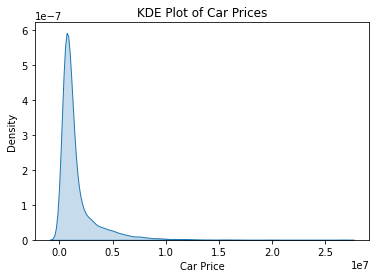

In [32]:
sns.kdeplot(cleaned_df['Car_price'].dropna(), shade=True)
plt.title('KDE Plot of Car Prices')
plt.xlabel('Car Price')
plt.ylabel('Density')
plt.show()

A univariate analysis was performed on the dataset to examine the distribution of each numeric column. The KDE plot of the price column revealed a high density around the price of 0.1.

In [ ]:
# Age Distribution (KDE Plot):

In [35]:
year_data = cleaned_df['Year'].dropna()

In [39]:
year_data = year_data[~np.isnan(year_data)]

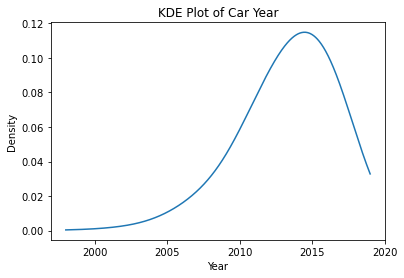

In [43]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(year_data, bw_method=0.5)
x = np.linspace(np.min(year_data), np.max(year_data), 1000)
plt.plot(x, kde(x), label='KDE')
plt.title('KDE Plot of Car Year')
plt.xlabel('Year')
plt.ylabel('Density')
plt.show()

"The KDE plot of the `age` column reveals that the density peaks around the year 2014, indicating that this age group of vehicles has the highest concentration of sales."

In [ ]:
# Odometer Reading Distribution (KDE Plot):

In [46]:
print(type(kilometers_data))
print(kilometers_data.shape)
print(kilometers_data[:10])  # Check the first few values

<class 'numpy.ndarray'>
(6019,)
[72000 41000 46000 87000 40670 75000 86999 36000 64430 65932]


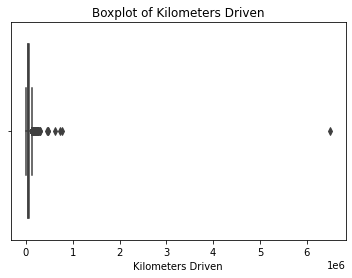

In [49]:
# Boxplot
sns.boxplot(x=kilometers_data)
plt.title('Boxplot of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.show()

In [ ]:
# Plotting Car Listings by Fuel Type

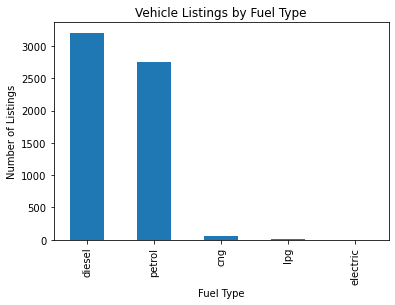

In [51]:
cleaned_df['Fuel_Type'].value_counts().plot(kind='bar')
plt.title('Vehicle Listings by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Listings')
plt.show()

In [ ]:
# Manufacturer Listings Distribution (Bar Plot):

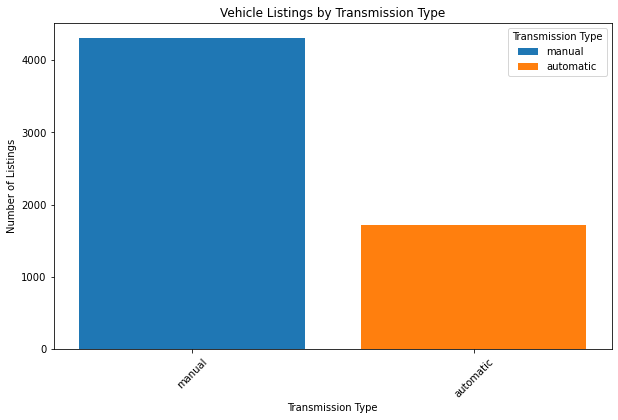

In [66]:
transmission_counts = cleaned_df['Transmission'].value_counts()

# Plot histogram with different colors
plt.figure(figsize=(10, 6))

# Get a colormap with distinct colors
colors = plt.get_cmap('tab10').colors

# Plot each transmission type in a different color
for i, (transmission_type, count) in enumerate(transmission_counts.items()):
    plt.bar(transmission_type, count, color=colors[i % len(colors)], label=transmission_type)

plt.title('Vehicle Listings by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.legend(title='Transmission Type')
plt.show()

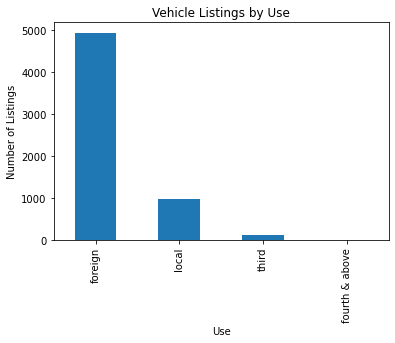

In [55]:
# Plot the number of vehicle listings by use type
cleaned_df['Use'].value_counts().plot(kind='bar')
plt.title('Vehicle Listings by Use')
plt.xlabel('Use')
plt.ylabel('Number of Listings')
plt.show()

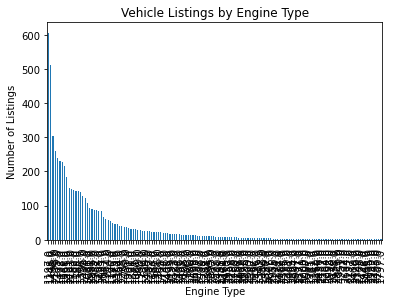

In [56]:
# Plot the number of vehicle listings by engine type
cleaned_df['Engine'].value_counts().plot(kind='bar')
plt.title('Vehicle Listings by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Listings')
plt.show()

## Multivariate Analysis

In [ ]:
# Price vs. Age (Scatter Plot):

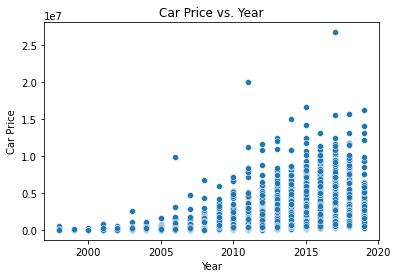

In [57]:
sns.scatterplot(x=cleaned_df['Year'], y=cleaned_df['Car_price'])
plt.title('Car Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Car Price')
plt.show()

In [ ]:
# Price vs. Kilometers Driven (Scatter Plot)

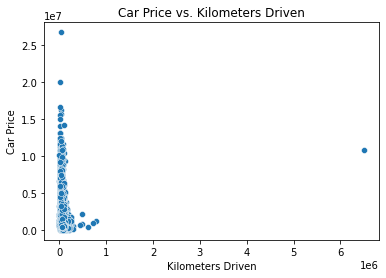

In [58]:
sns.scatterplot(x=cleaned_df['Kilometers_Driven'], y=cleaned_df['Car_price'])
plt.title('Car Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Car Price')
plt.show()

In [ ]:
# Price vs. Engine Capacity (Box Plot):

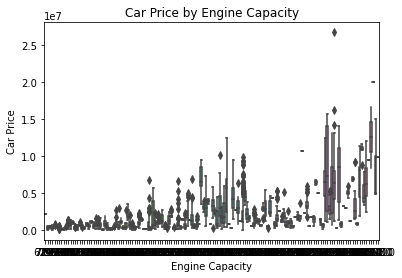

In [60]:
sns.boxplot(x='Engine', y='Car_price', data=cleaned_df)
plt.title('Car Price by Engine Capacity')
plt.xlabel('Engine Capacity')
plt.ylabel('Car Price')
plt.show()

In [ ]:
# Correlation Matrix:

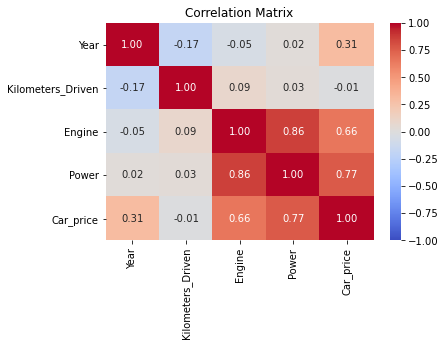

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns and calculate the correlation matrix
corr = cleaned_df[['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Car_price']].corr()

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

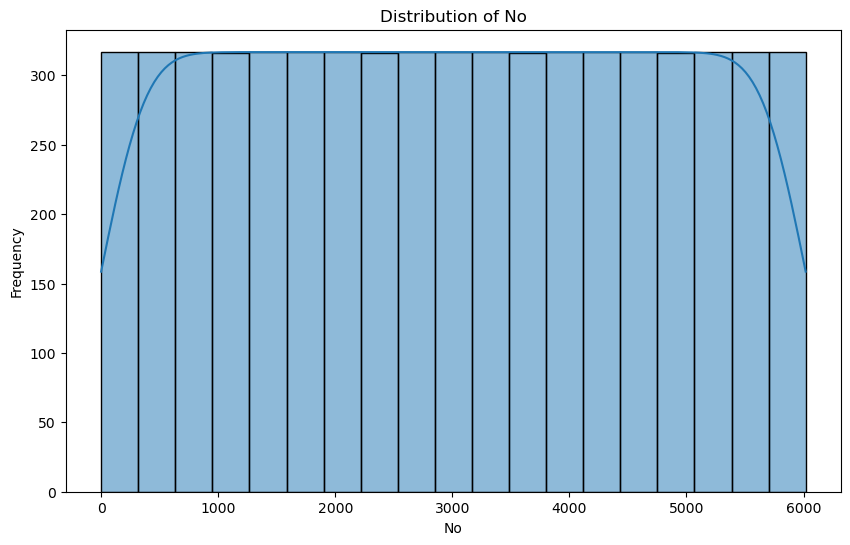

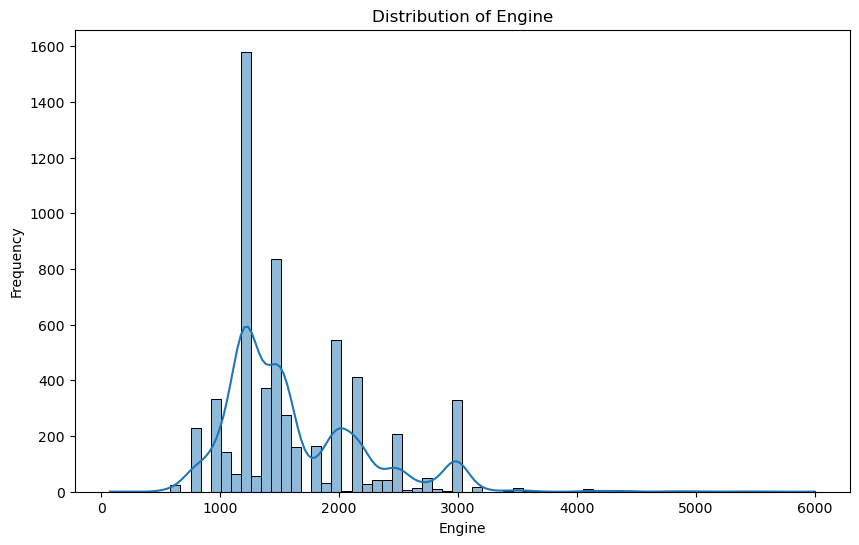

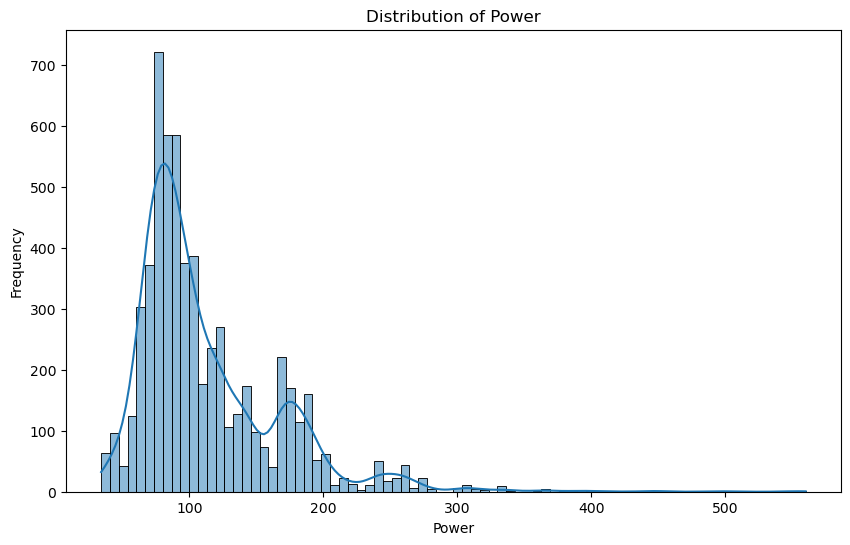

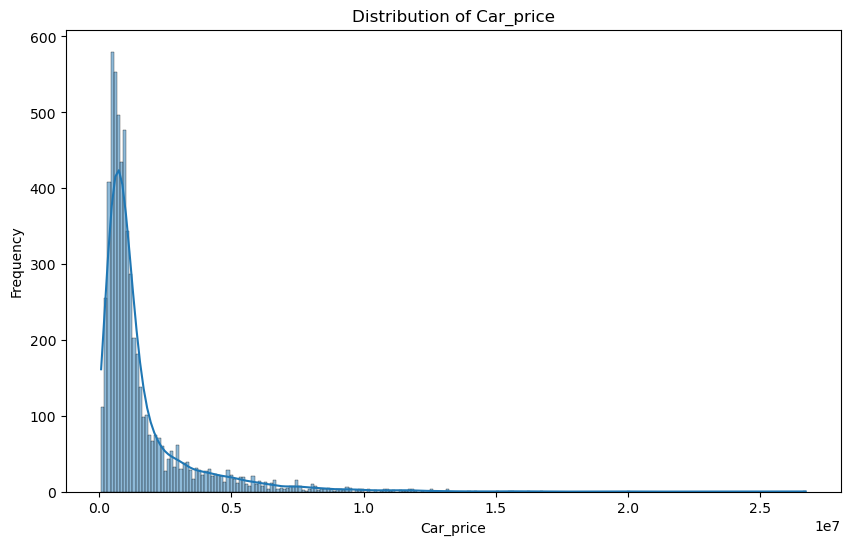

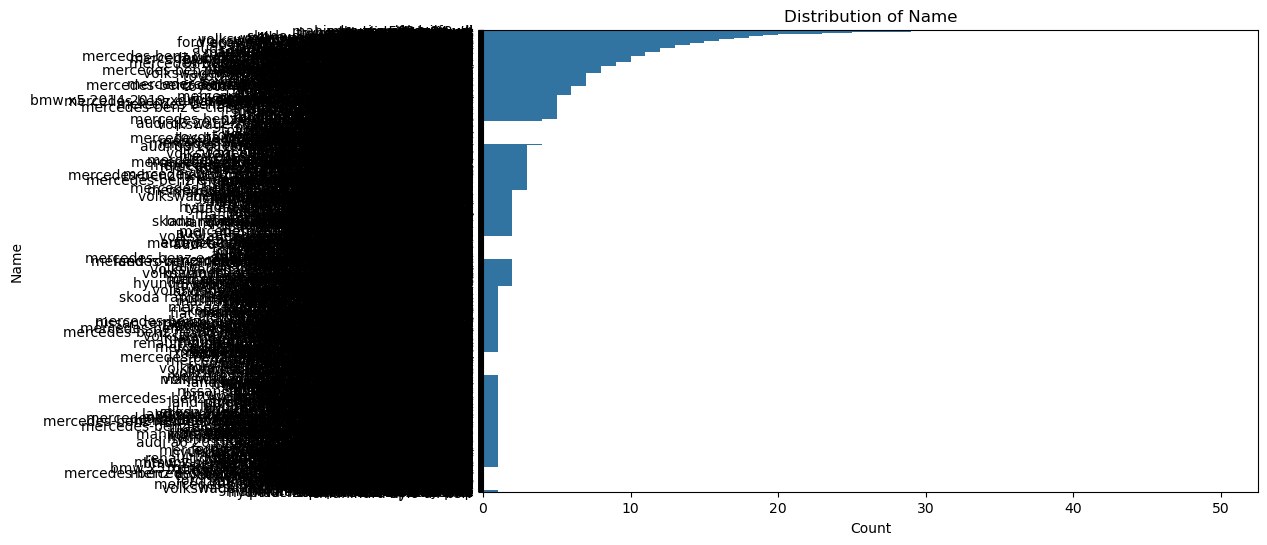

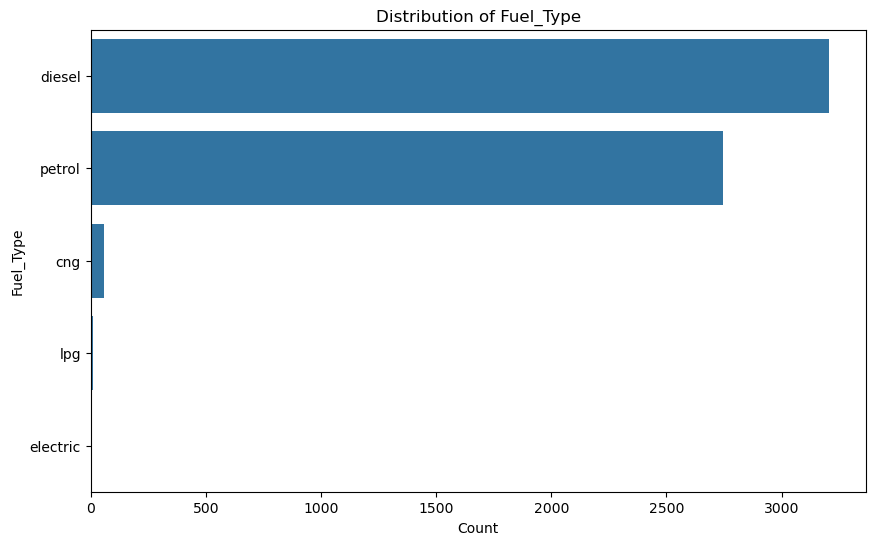

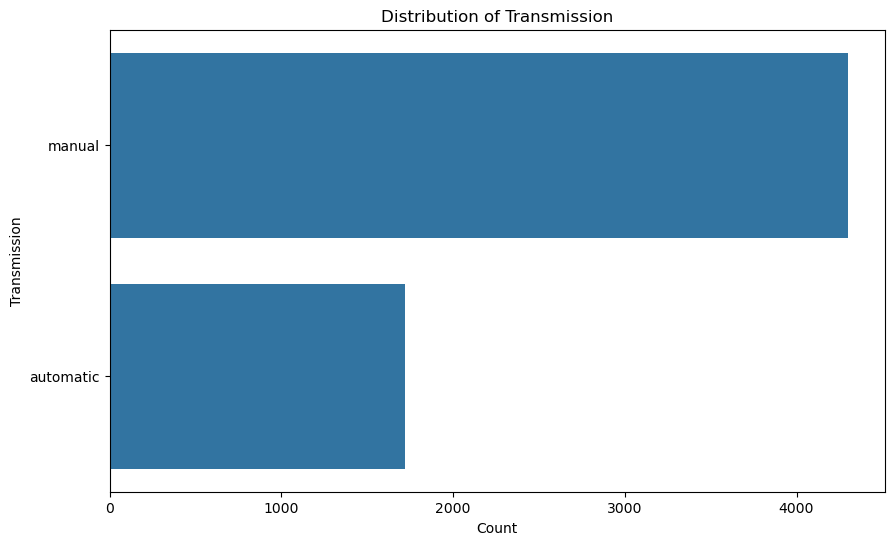

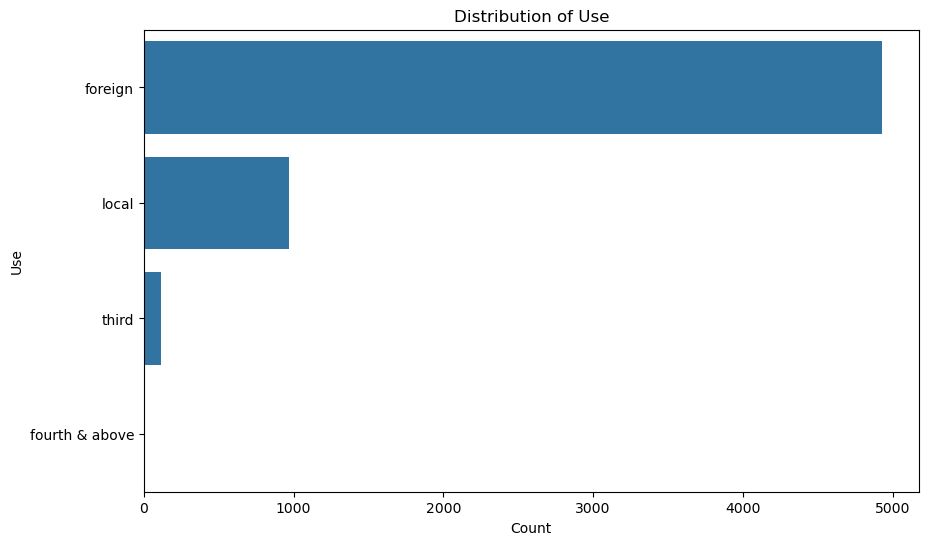

In [16]:
class EDA(DataCleaner):
    def __init__(self, file_path):
        super().__init__(file_path)
        self.cleaned_data = self.clean_data()

    def univariate_analysis(self):
        if self.cleaned_data is not None:
            numerical_columns = self.cleaned_data.select_dtypes(include=['float64', 'int64']).columns
            categorical_columns = self.cleaned_data.select_dtypes(include=['object']).columns

            # Plotting numerical features
            for column in numerical_columns:
                plt.figure(figsize=(10, 6))
                sns.histplot(self.cleaned_data[column], kde=True)
                plt.title(f'Distribution of {column}')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.show()

            # Plotting categorical features
            for column in categorical_columns:
                plt.figure(figsize=(10, 6))
                sns.countplot(y=self.cleaned_data[column], order=self.cleaned_data[column].value_counts().index)
                plt.title(f'Distribution of {column}')
                plt.xlabel('Count')
                plt.ylabel(column)
                plt.show()
        else:
            print("No data available for univariate analysis.")

    def bivariate_analysis(self):
        if self.cleaned_data is not None:
            # Scatter plot for each numerical variable against the target variable 'Car_price'
            target = 'Car_price'
            numerical_columns = self.cleaned_data.select_dtypes(include=['float64', 'int64']).columns
            numerical_columns = numerical_columns.drop(target)  # Drop the target variable from the list

            for column in numerical_columns:
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=self.cleaned_data[column], y=self.cleaned_data[target])
                plt.title(f'{column} vs {target}')
                plt.xlabel(column)
                plt.ylabel(target)
                plt.show()

            numerical_data = self.cleaned_data.select_dtypes(include=['number'])

            # Correlation Matrix
            plt.figure(figsize=(10, 6))
            sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
            plt.title('Correlation Matrix')
            plt.show()
        else:
            print("No data available for bivariate analysis.")

    def pairplot_analysis(self):
        if self.cleaned_data is not None:
            sns.pairplot(self.cleaned_data)
            plt.show()
        else:
            print("No data available for pairplot analysis.")

eda = EDA(file)
eda.univariate_analysis()

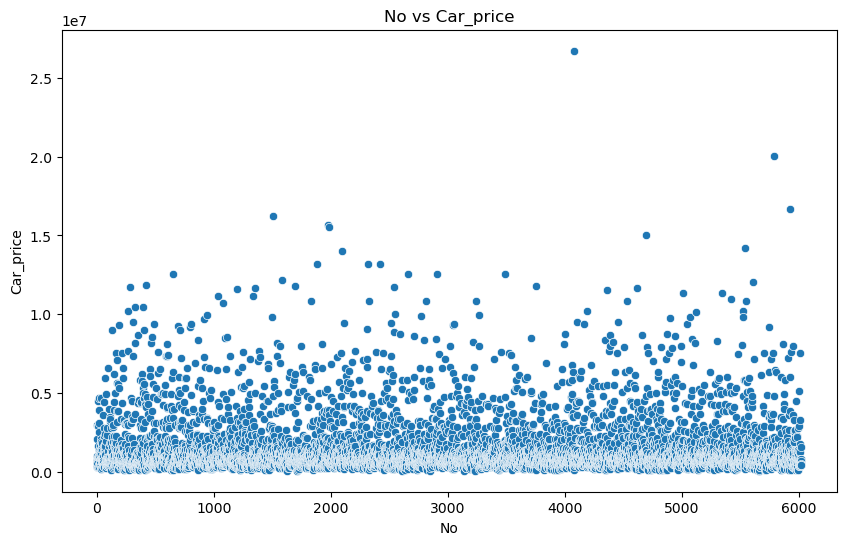

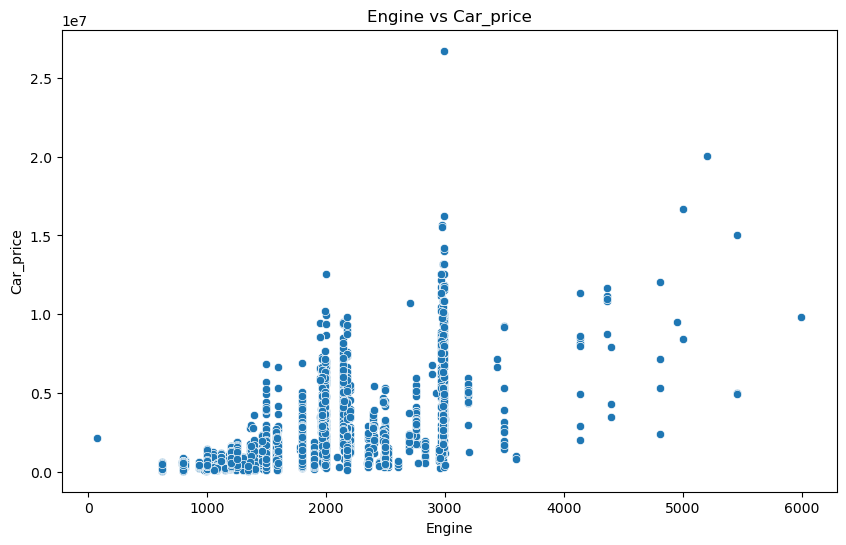

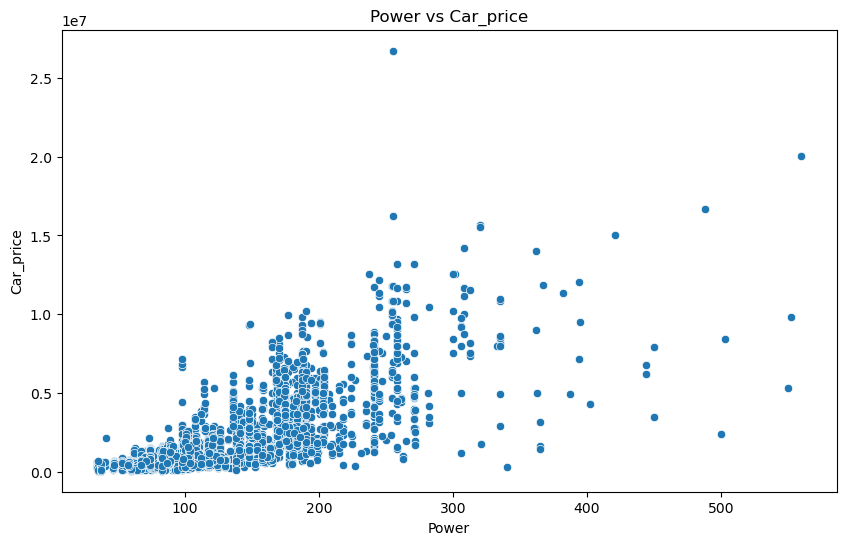

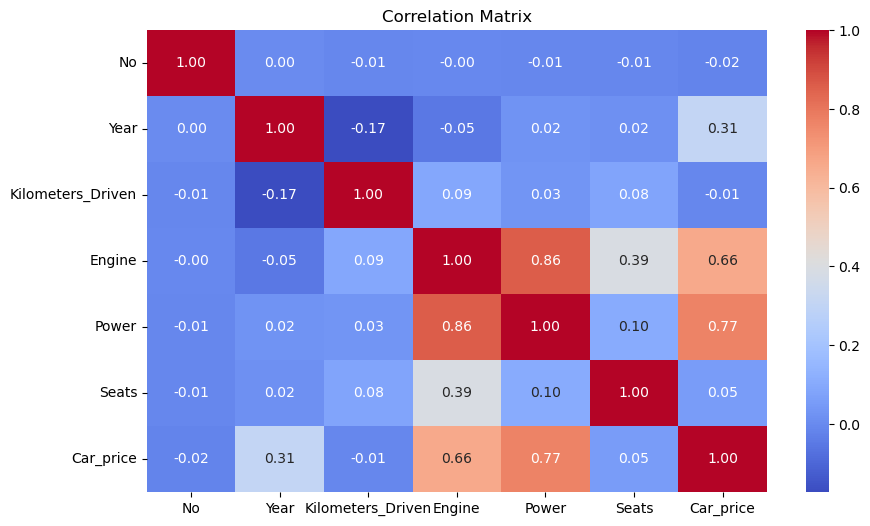

In [17]:
eda.bivariate_analysis()

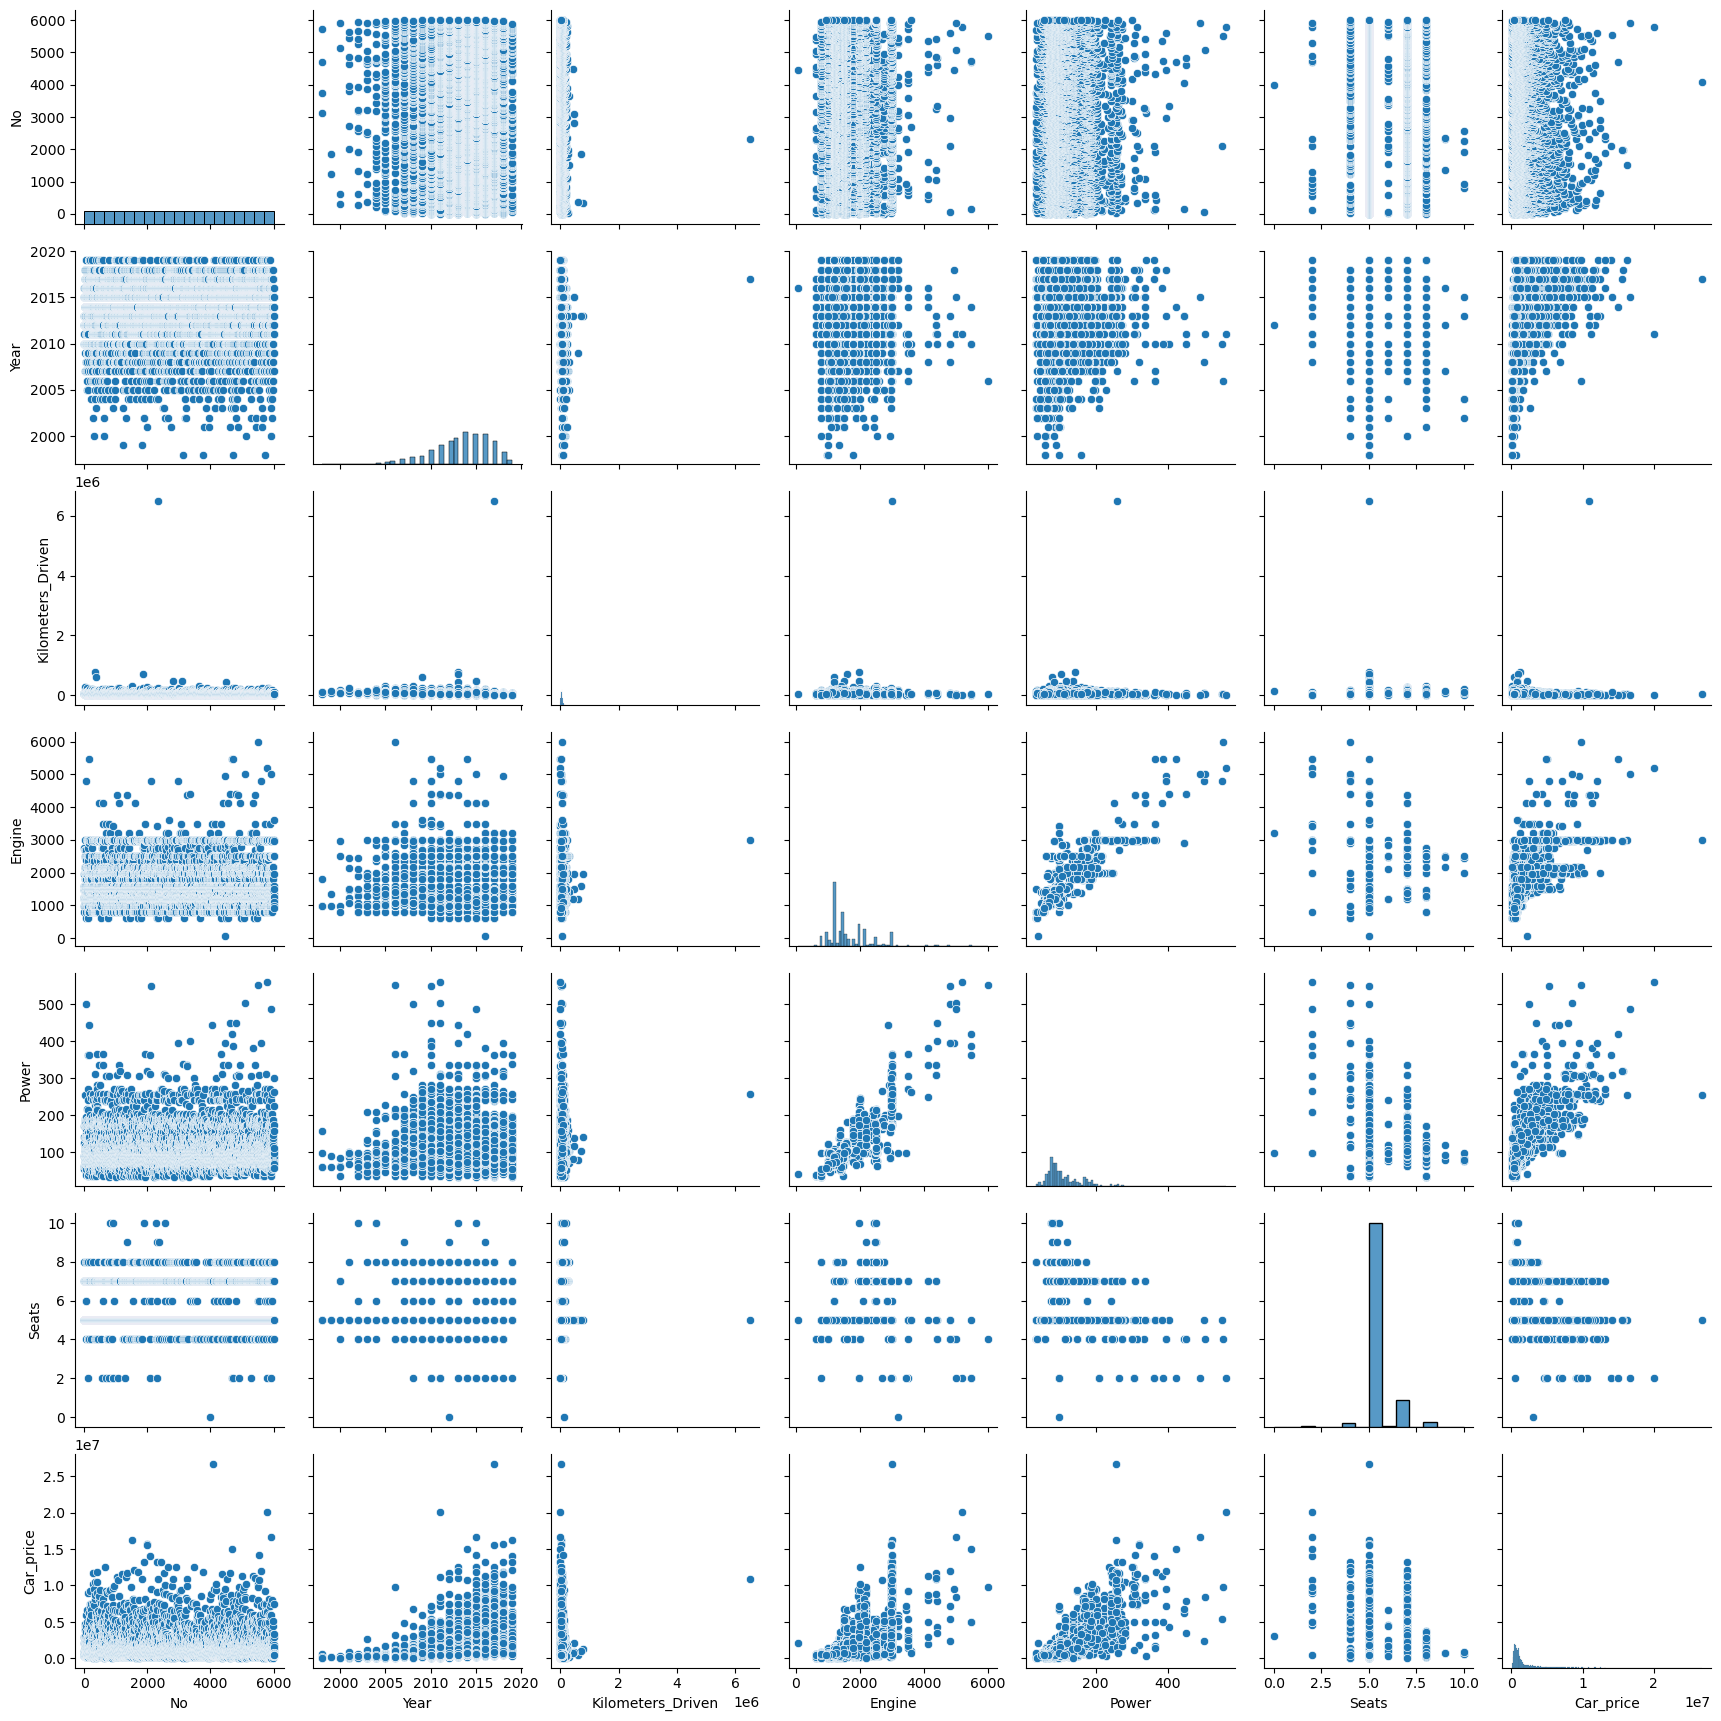

In [18]:
eda.pairplot_analysis()

### Modelling

In [19]:
cleaned_df.head()

,No,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Use,Engine,Power,Seats,Car_price
0,0,maruti wagon r lxi cng,2010,72000,cng,manual,foreign,998.0,58.16,5,292250.0
1,1,hyundai creta 1.6 crdi sx option,2015,41000,diesel,manual,foreign,1582.0,126.20,5,2087500.0
2,2,honda jazz v,2011,46000,petrol,manual,foreign,1199.0,88.70,5,751500.0
3,3,maruti ertiga vdi,2012,87000,diesel,manual,foreign,1248.0,88.76,7,1002000.0
4,4,audi a4 new 2.0 tdi multitronic,2013,40670,diesel,automatic,local,1968.0,140.80,5,2962580.0


Linear Regression - Cross-Validation R^2 Scores: [ 0.22513022  0.74536526  0.56321321 -0.06660155  0.09446245]
Linear Regression - Cross-vaidation Mean R^2 Score: 0.3123139169238196
Linear Regression - MAE: 768470.8795774243, MSE: 2375005016473.0044, R^2: 0.3079834652858313


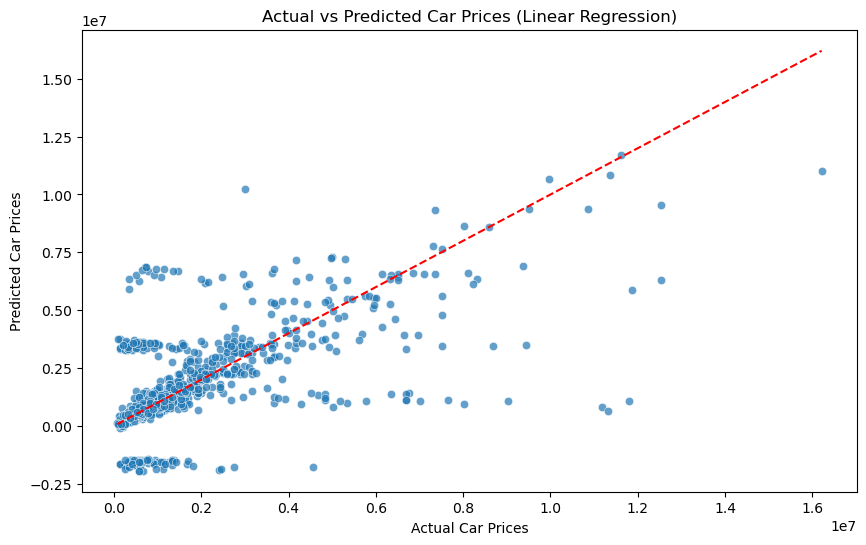

Ridge Regression - Cross-Validation R^2 Scores: [0.77393395 0.76123543 0.77603359 0.81255865 0.71642046]
Ridge Regression - Cross-vaidation Mean R^2 Score: 0.7680364178358496
Ridge Regression - MAE: 460478.09749831876, MSE: 772599498122.0957, R^2: 0.774884000789884


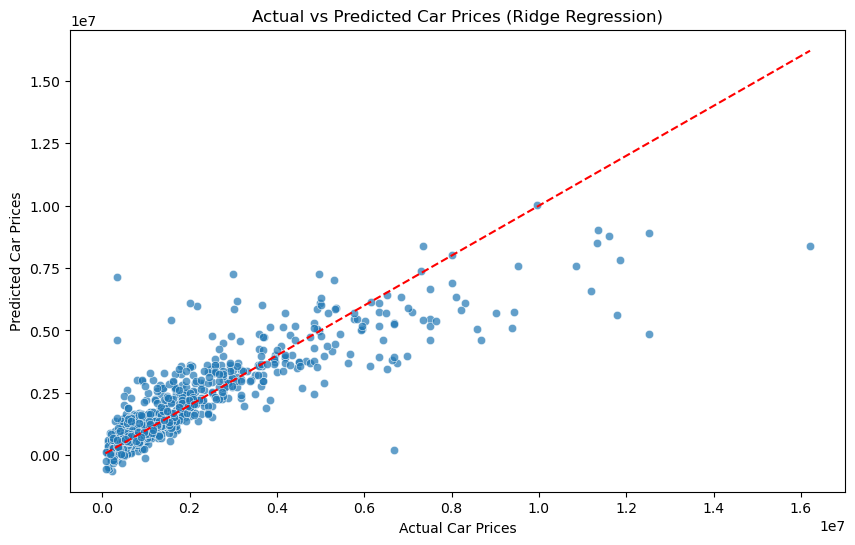

c:\Users\user\anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285959283119597.6, tolerance: 1356487793798.8208
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\user\anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302005014563796.7, tolerance: 1407130511132.0688
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\user\anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254890825065003.06, tolerance: 1256704589181.5354
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\user\anaconda3\envs\new_env\lib\site-pa

Lasso Regression - Cross-Validation R^2 Scores: [0.70670614 0.76885611 0.71459752 0.74000698 0.6616211 ]
Lasso Regression - Cross-vaidation Mean R^2 Score: 0.7183575706918227


c:\Users\user\anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394826929815328.4, tolerance: 1687525907951.802
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso Regression - MAE: 453279.8376087175, MSE: 874295140395.4535, R^2: 0.7452524566569578


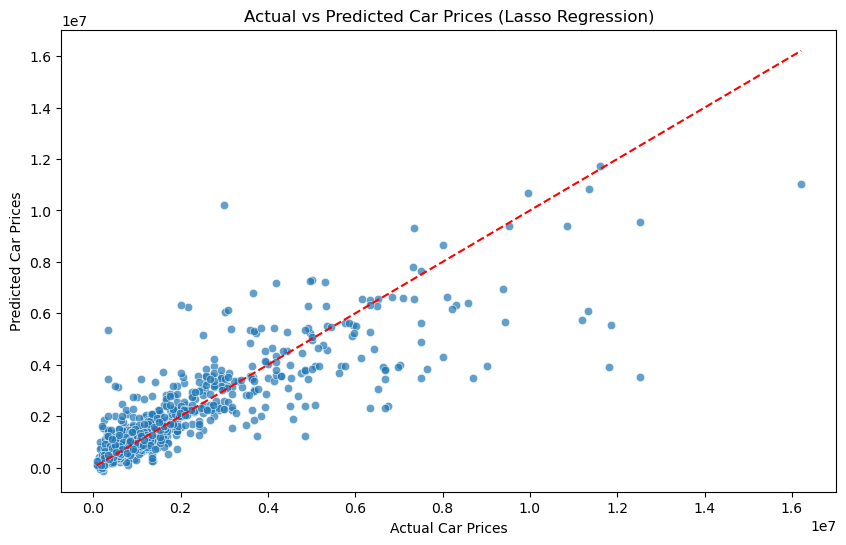

Elastic_net Regression - Cross-Validation R^2 Scores: [0.59577396 0.57740847 0.57767946 0.62013586 0.53923689]
Elastic_net Regression - Cross-vaidation Mean R^2 Score: 0.5820469267689221
Elastic_net Regression - MAE: 686857.5289906537, MSE: 1459682680748.4897, R^2: 0.5746852981329946


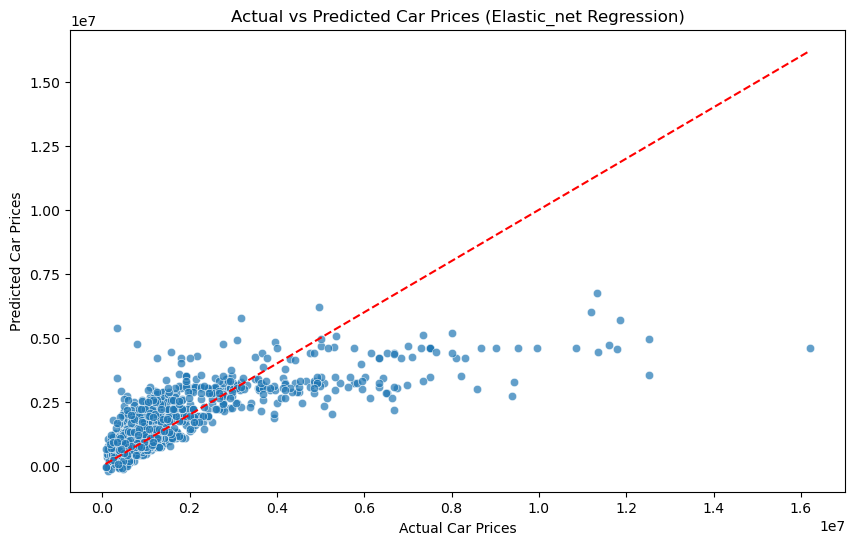

Random Regression - Cross-Validation R^2 Scores: [0.73332636 0.77632731 0.76914487 0.85881926 0.75385044]
Random Regression - Cross-vaidation Mean R^2 Score: 0.7782936477933975
Random Regression - MAE: 395021.7890619117, MSE: 698439470859.9653, R^2: 0.7964923614983006


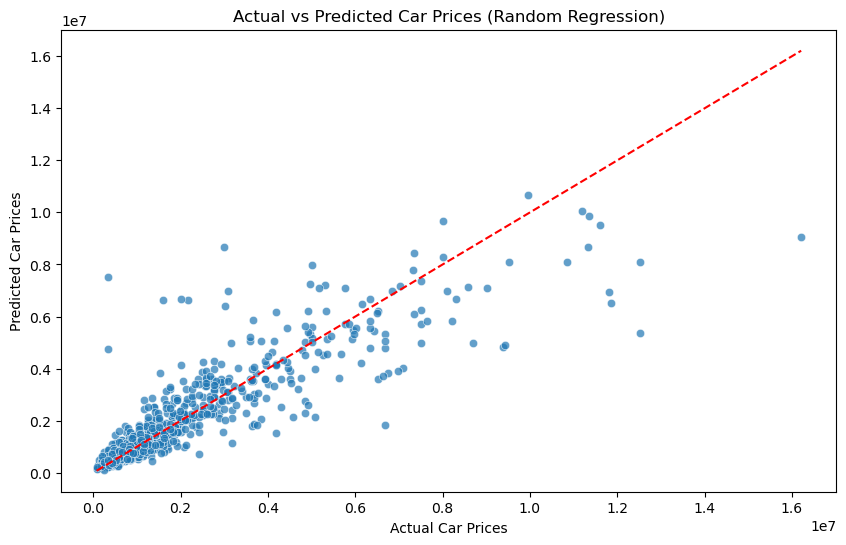

Knn Regression - Cross-Validation R^2 Scores: [0.76580804 0.75937931 0.73829105 0.79187457 0.71964878]
Knn Regression - Cross-vaidation Mean R^2 Score: 0.755000349450188
Knn Regression - MAE: 426988.4850498339, MSE: 873840171044.5515, R^2: 0.7453850232458402


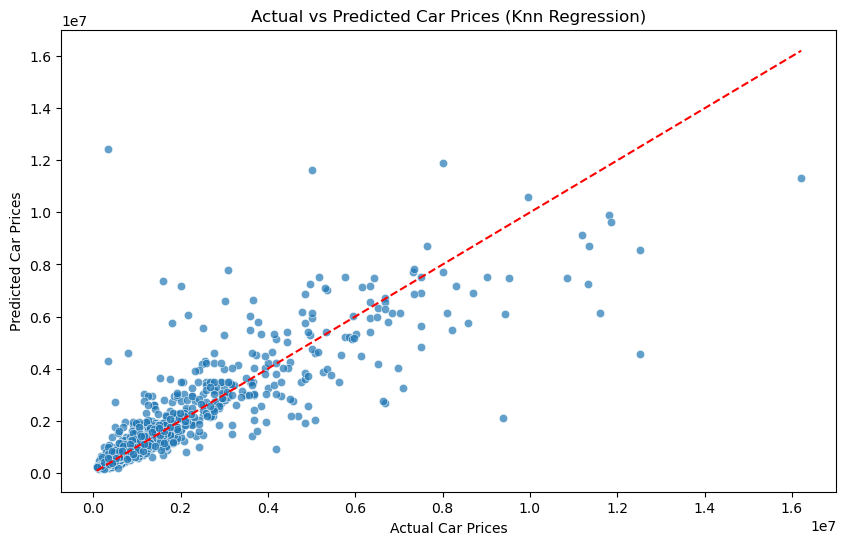

Xgboost Regression - Cross-Validation R^2 Scores: [0.69567122 0.78054069 0.74782756 0.83982176 0.73925987]
Xgboost Regression - Cross-vaidation Mean R^2 Score: 0.7606242194900334
Xgboost Regression - MAE: 459324.31669175666, MSE: 734427387517.202, R^2: 0.7860063906460338


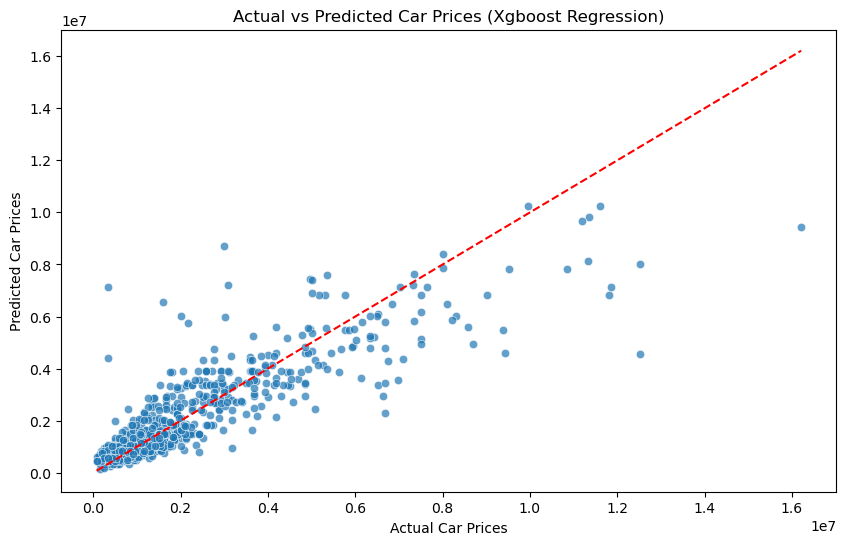

Catboost Regression - Cross-Validation R^2 Scores: [0.72054786 0.76208752 0.72671861 0.81907379 0.73359716]
Catboost Regression - Cross-vaidation Mean R^2 Score: 0.7524049870817802
Catboost Regression - MAE: 487679.1740855309, MSE: 777110929406.0267, R^2: 0.7735694835480031


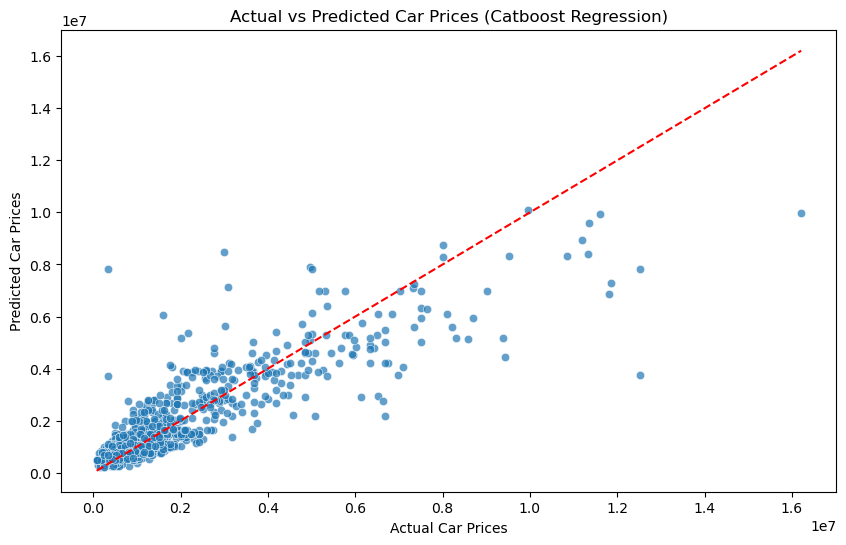

Svr Regression - Cross-Validation R^2 Scores: [-0.1424399  -0.10931179 -0.0983232  -0.12455379 -0.11844689]
Svr Regression - Cross-vaidation Mean R^2 Score: -0.1186151118208533
Svr Regression - MAE: 1001398.0305461873, MSE: 3813448128270.3516, R^2: -0.11114256211419526


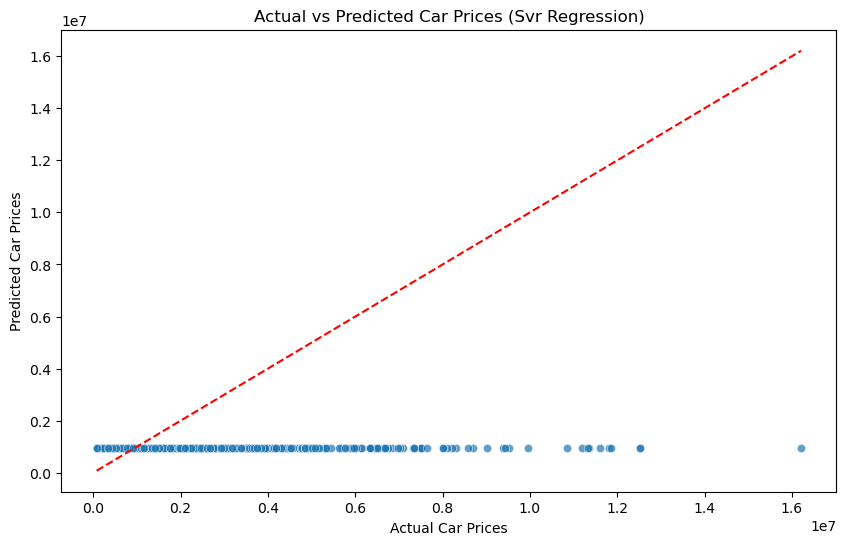

Polynomial Regression - Cross-Validation R^2 Scores: [0.24480183 0.55494186 0.70984918 0.07325372 0.61120242]
Polynomial Regression - Cross-vaidation Mean R^2 Score: 0.438809800901004
Polynomial Regression - MAE: 482430.44484636624, MSE: 1147127196135.3062, R^2: 0.6657560798230179


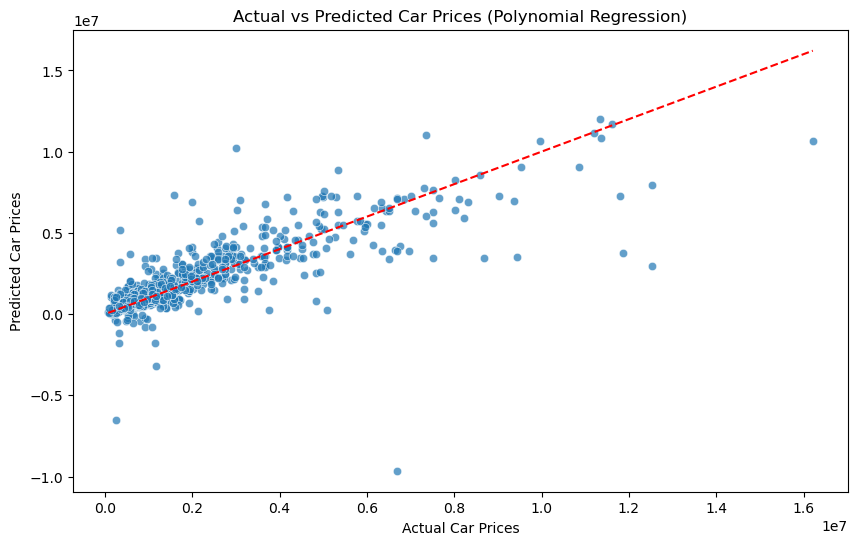

In [20]:
# Creating a class to help us model using different regression models utilizing pipelines
class ModelPipeline(DataCleaner):
    def __init__(self, file):
        super().__init__(file)
        self.cleaned_data = self.clean_data()

    def create_pipeline(self):
        if self.cleaned_data is not None:
            # Define categorical columns to be encoded
            categorical_features = self.cleaned_data.select_dtypes(include=['object']).columns.tolist()
            numerical_features = self.cleaned_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
            numerical_features.remove('Car_price')  # Correctly removing target variable from the list
            numerical_features.remove('No')         # Correctly removing 'No' column from the list

            # Create a column transformer and using 'pass through' to Pass through the numerical features without transformation

            preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features),('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],remainder='passthrough') 
            # Define the various regression pipelines
            pipelines = {
                'linear': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())]),
                'ridge': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge())]),
                'lasso': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Lasso())]),
                'elastic_net': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', ElasticNet())]),
                'random': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())]),
                'knn': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', KNeighborsRegressor())]),
                'xgboost': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', XGBRegressor())]),
                'catboost': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', CatBoostRegressor(verbose=0))]),
                'svr': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR())]),
                'polynomial': Pipeline(steps=[
                    ('preprocessor', preprocessor),
                    ('poly_features', PolynomialFeatures(include_bias=False)),
                    ('regressor', LinearRegression())
                ])
            }

            # Splitting the data into train and test
            X = self.cleaned_data[numerical_features + categorical_features]
            y = self.cleaned_data['Car_price']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Storing the pipelines and data splits
            self.pipelines = pipelines
            self.X_train = X_train
            self.X_test = X_test
            self.y_train = y_train
            self.y_test = y_test

            return pipelines
    # Function to perform cross validation
    def cross_validate_model(self, model_name):
        model_name = model_name.lower()
        if model_name not in self.pipelines:
            print(f"Model name '{model_name}' not found")
            return

        pipeline = self.pipelines[model_name]

        # Performing cross-validation on our models
        cv_scores = cross_val_score(pipeline, self.X_train, self.y_train, cv=5, scoring='r2')
        print(f'{model_name.capitalize()} Regression - Cross-Validation R^2 Scores: {cv_scores}')
        print(f'{model_name.capitalize()} Regression - Cross-vaidation Mean R^2 Score: {cv_scores.mean()}')

    # Visualizing our model line of best fir
    def visualize_model(self, model_name):
        model_name = model_name.lower()
        if model_name not in self.pipelines:
            print(f"Model name '{model_name}' not found")
            return

        pipeline = self.pipelines[model_name]

        # Fitting the models
        pipeline.fit(self.X_train, self.y_train)

        # Predicting on the test sets
        y_pred = pipeline.predict(self.X_test)

        # Evaluating the models
        mae = mean_absolute_error(self.y_test, y_pred)
        mse = mean_squared_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)
        print(f'{model_name.capitalize()} Regression - MAE: {mae}, MSE: {mse}, R^2: {r2}')

        # Visualization of Predicted vs Actual Prices of our models
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=self.y_test, y=y_pred, alpha=0.7)
        plt.plot([self.y_test.min(), self.y_test.max()], [self.y_test.min(), self.y_test.max()], color='red', linestyle='--')
        plt.xlabel('Actual Car Prices')
        plt.ylabel('Predicted Car Prices')
        plt.title(f'Actual vs Predicted Car Prices ({model_name.capitalize()} Regression)')
        plt.show()
# Creating an instance of theclass and calling the create_pipeline method
model_pipeline = ModelPipeline(file)
pipelines = model_pipeline.create_pipeline()

# Cross-validating and visualize the models
if pipelines:
    for model_name in pipelines.keys():
        model_pipeline.cross_validate_model(model_name)
        model_pipeline.visualize_model(model_name)
           
   



Seems our best performing models is the randomforest regressor,xgboost,ridge regressor,catboost regressor and knn regressor respectively hence we will  tune the randomforest regression model using gridsearch to achieve the best performance since its the best performing mode

The support vector regression model is the worst performing model 

In [25]:
# tunning the random regression model

categorical_features = cleaned_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = cleaned_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('Car_price')  # Correctly removing target variable from the list
numerical_features.remove('No') 

preprocessor = ColumnTransformer(transformers=[ ('num', StandardScaler(), numerical_features),('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],remainder='passthrough') 

random_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor())])

X = cleaned_df[numerical_features + categorical_features]
y = cleaned_df['Car_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_pipeline.fit(X_train, y_train)
y_pred = random_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regression - MAE: {mae}, MSE: {mse}, R^2: {r2}')




Random Forest Regression - MAE: 395032.0303373215, MSE: 701701598714.4885, R^2: 0.7955418597528204


In [28]:


# Defining the parameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 150],       # Number of trees in the forest
    'regressor__max_features': ['log2', 'sqrt'],      # Number of features to consider for the best split
    'regressor__max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'regressor__min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'regressor__min_samples_leaf': [1, 2, 4],         # Minimum number of sample
}

# Creating the GridSearchCV 
grid_search = GridSearchCV(
    estimator=random_pipeline,
    param_grid=param_grid,
    cv=5,  
    scoring='neg_mean_squared_error',  
    n_jobs=-1,  
    verbose=2  
)

# Fittinf the GridSearchCV on the train data
grid_search.fit(X_train, y_train)

#finding the best parameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# fitting and testing the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest Regression with Grid Search - MAE: {mae}, MSE: {mse}, R^2: {r2}')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'regressor__max_depth': None, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 100}
Best Score: 761998526121.4838
Random Forest Regression with Grid Search - MAE: 401276.01092960587, MSE: 701204382909.4563, R^2: 0.7956867358924569


In [29]:
#saving the model as a pickle file
import joblib
import pickle
joblib.dump(random_pipeline, 'random_forest_pipeline.pkl')

['random_forest_pipeline.pkl']